# Introduction

In this lab, we will learn how to balance model complexity and cross-validated score by finding a decent accuracy within 1 standard deviation of the best accuracy score while minimizing the number of PCA components. We will use the digits dataset from scikit-learn and a pipeline consisting of PCA and LinearSVC.



# Import Libraries

We will start by importing the necessary libraries for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

# Define Functions

We will define two functions that will be used later in the lab.

In [3]:
def lower_bound(cv_results):
    """
    Calculate the lower bound within 1 standard deviation
    of the best `mean_test_scores`.

    Parameters
    ----------
    cv_results : dict of numpy(masked) ndarrays
        See attribute cv_results_ of `GridSearchCV`

    Returns
    -------
    float
        Lower bound within 1 standard deviation of the
        best `mean_test_score`.
    """
    best_score_idx = np.argmax(cv_results["mean_test_score"])

    return (
        cv_results["mean_test_score"][best_score_idx]
        - cv_results["std_test_score"][best_score_idx]
    )


def best_low_complexity(cv_results):
    """
    Balance model complexity with cross-validated score.

    Parameters
    ----------
    cv_results : dict of numpy(masked) ndarrays
        See attribute cv_results_ of `GridSearchCV`.

    Return
    ------
    int
        Index of a model that has the fewest PCA components
        while has its test score within 1 standard deviation of the best
        `mean_test_score`.
    """
    threshold = lower_bound(cv_results)
    candidate_idx = np.flatnonzero(cv_results["mean_test_score"] >= threshold)
    best_idx = candidate_idx[
        cv_results["param_reduce_dim__n_components"][candidate_idx].argmin()
    ]
    return best_idx

# Load Data and Define Pipeline

We will load the digits dataset from scikit-learn and define a pipeline consisting of PCA and LinearSVC.

In [4]:
pipe = Pipeline(
    [
        ('reduce_dim', PCA(n_components=2)),
        ('classify', LinearSVC(random_state=0, C=0.01, dual='auto')),
    ]
)

X, y = load_digits(return_X_y=True)

# Define Parameters for GridSearchCV

We will define the parameters for GridSearchCV.

In [5]:
param_grid = {'reduce_dim__n_components': [6, 8, 10, 12, 14]}

# Define GridSearchCV Object

We will define the GridSearchCV object and fit the model.

In [6]:
grid = GridSearchCV(
    pipe,
    cv=10,
    n_jobs=1,
    param_grid=param_grid,
    scoring='accuracy',
    refit=best_low_complexity,
)

grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('reduce_dim', PCA(n_components=2)),
                                       ('classify',
                                        LinearSVC(C=0.01, random_state=0))]),
             n_jobs=1,
             param_grid={'reduce_dim__n_components': [6, 8, 10, 12, 14]},
             refit=<function best_low_complexity at 0x135209e40>,
             scoring='accuracy')

# Visualize Results

We will visualize the results by plotting the accuracy versus the number of PCA components.

The best_index_ is 2
The n_components selected is 10
The corresponding accuracy score is 0.88


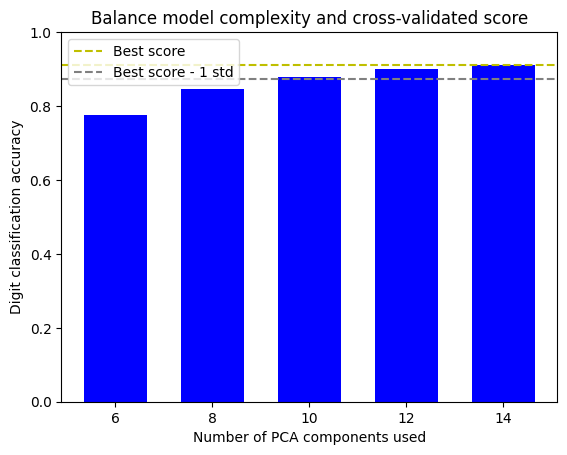

In [7]:
n_components = grid.cv_results_["param_reduce_dim__n_components"]
test_scores = grid.cv_results_["mean_test_score"]

plt.figure()
plt.bar(n_components, test_scores, width=1.3, color='b')

lower = lower_bound(grid.cv_results_)
plt.axhline(np.max(test_scores), linestyle="--", color="y", label="Best score")
plt.axhline(lower, linestyle="--", color=".5", label="Best score - 1 std")

plt.title("Balance model complexity and cross-validated score")
plt.xlabel("Number of PCA components used")
plt.ylabel("Digit classification accuracy")
plt.xticks(n_components.tolist())
plt.ylim((0, 1.0))
plt.legend(loc="upper left")

best_index_ = grid.best_index_

print("The best_index_ is %d" % best_index_)
print("The n_components selected is %d" % n_components[best_index_])
print(
    "The corresponding accuracy score is %.2f"
    % grid.cv_results_["mean_test_score"][best_index_]
)
plt.show()


# Summary

In this lab, we learned how to balance model complexity and cross-validated score using PCA and LinearSVC. We used GridSearchCV to find the best number of PCA components while maximizing the accuracy score within 1 standard deviation of the best score. We also visualized the results to better understand the trade-off between model complexity and accuracy.